# GERMANY - Uppgift 1

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib
import importlib
import Functions
importlib.reload(Functions)
import plotly
import plotly_express as px

olympics = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')

In [42]:
germany, germany_all = Functions.hashed_names(olympics)
germany = germany.reset_index(drop=True)
germany.head(2)

,ID,Hash_Names,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,133,341116996c59575b8e0a66ad3d42f5063c72c9d5fd8840...,M,NaN,NaN,NaN,Germany,GER,1900 Summer,1900,Summer,Paris,Gymnastics,Gymnastics Men's Individual All-Around,NaN
1,389,0740975bf9235edebcecc325eeff6e611f13de55abfc11...,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN


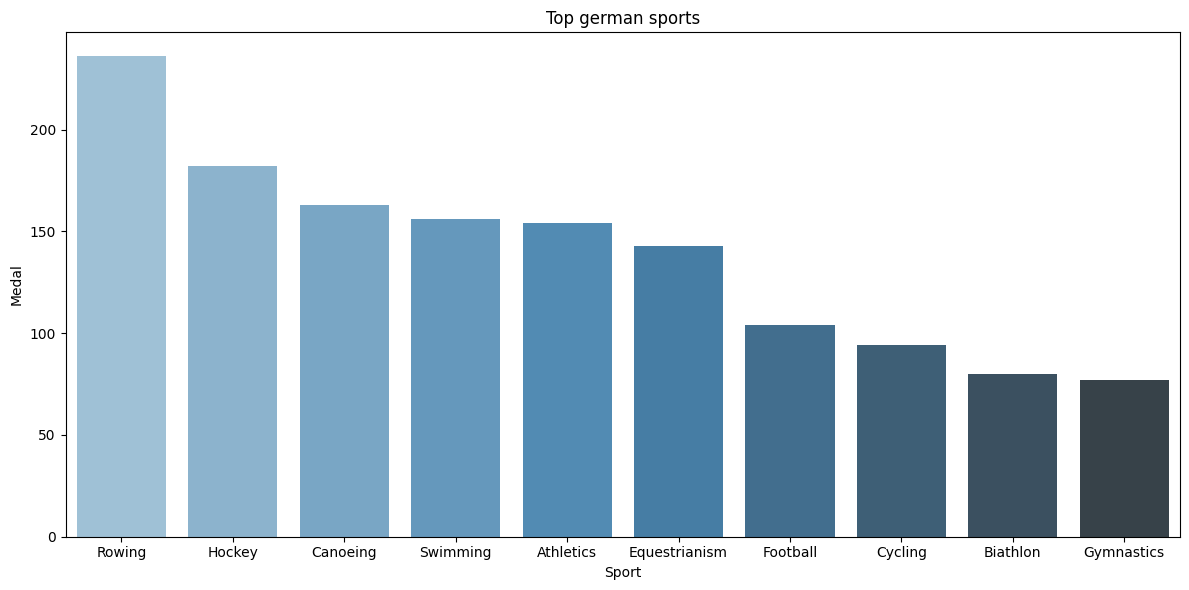

In [43]:
german_medals = germany[(germany["Medal"].notna())]
medals_per_sport = german_medals.groupby("Sport")["Medal"].count().reset_index()
top10 = medals_per_sport.sort_values(by='Medal', ascending= False).reset_index(drop=True).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top10, x = 'Sport', y = 'Medal', hue='Sport', palette='Blues_d')
plt.title('Top german sports')
plt.tight_layout()

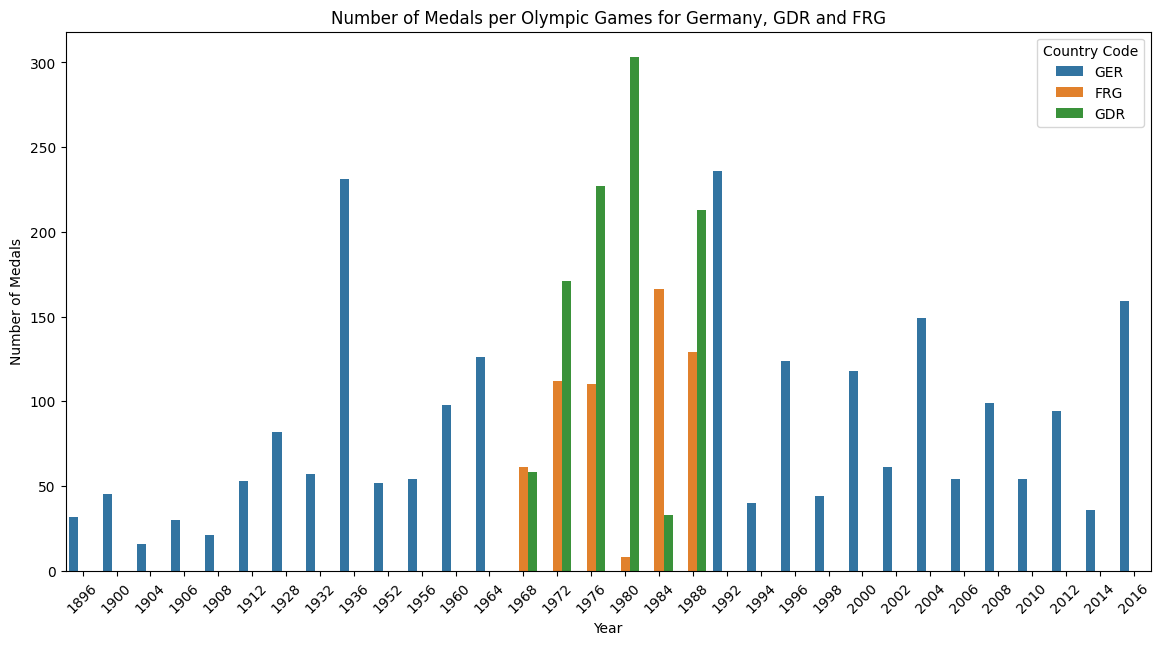

In [44]:
Functions.medals_each_year(olympics, ["GER", "GDR", "FRG"], "Number of Medals per Olympic Games for Germany, GDR and FRG")


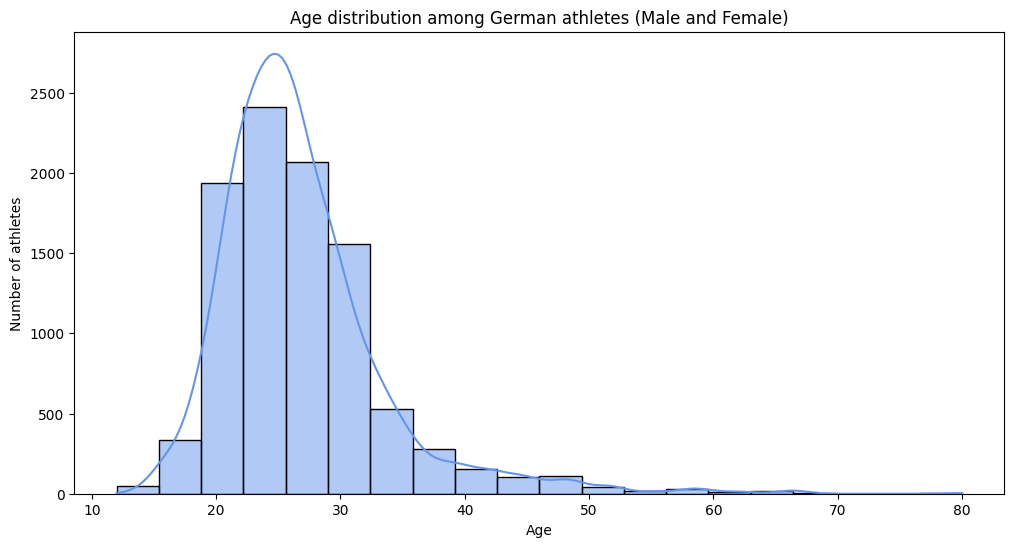

In [45]:
germany_age = germany[germany['Age'].notna()]

plt.figure(figsize=(12,6))
sns.histplot(data=germany_age, x='Age', bins=20, kde=True, color='cornflowerblue')
plt.title('Age distribution among German athletes (Male and Female)')
plt.xlabel('Age')
plt.ylabel('Number of athletes')
plt.show()

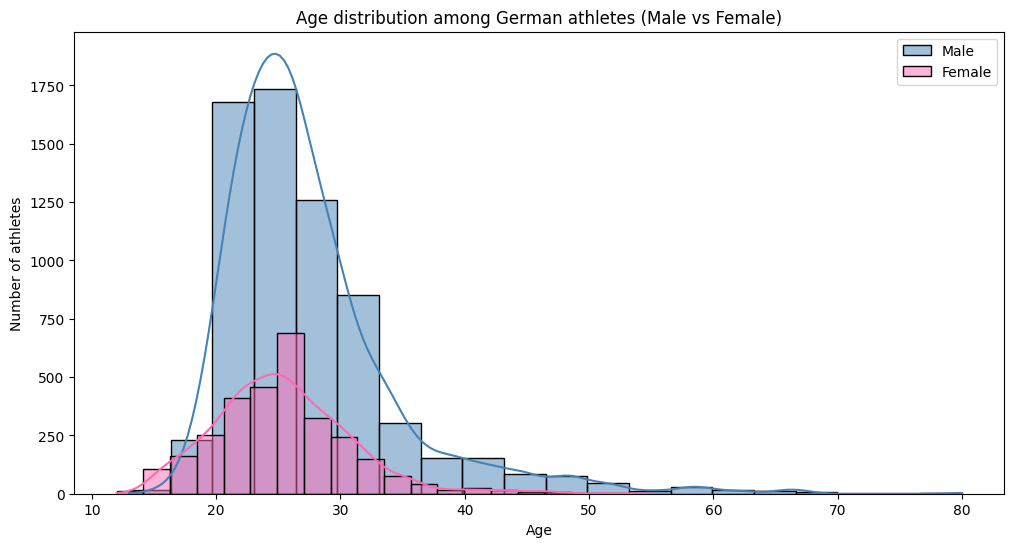

In [46]:
# personal note: alpha gör staplarna genomskinliga så man kan se båda samtidigt

plt.figure(figsize=(12,6))
sns.histplot(data=germany_age[germany_age['Sex'] == 'M'], x='Age', bins=20, kde=True, color='steelblue', label='Male', alpha=0.5)
sns.histplot(data=germany_age[germany_age['Sex'] == 'F'], x='Age', bins=20, kde=True, color='hotpink', label='Female', alpha=0.5)
plt.title('Age distribution among German athletes (Male vs Female)')
plt.xlabel('Age')
plt.ylabel('Number of athletes')
plt.legend()
plt.show()

## Väst och Öst-Tyskland

In [47]:
east_germany = germany_all[germany_all['NOC'] == 'GDR'].copy()
west_germany = germany_all[germany_all['NOC'] == 'FRG'].copy()

Text(0.5, 1.0, 'Sex distribution - East Germany (GDR)')

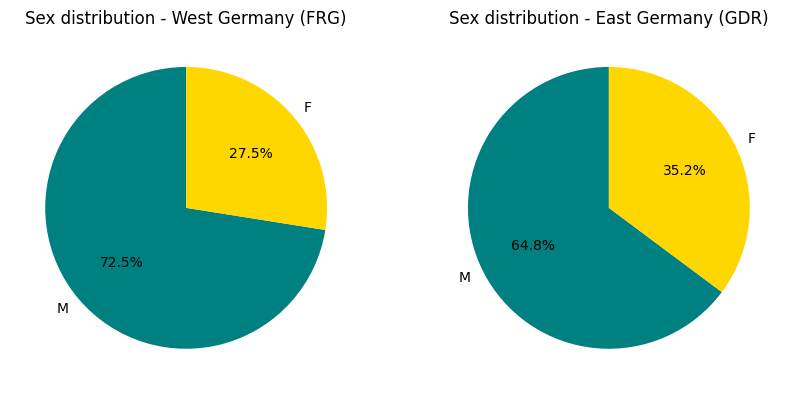

In [48]:
east_sex = east_germany['Sex'].value_counts()
west_sex = west_germany['Sex'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].pie(west_sex, labels = west_sex.index, autopct='%1.1f%%', startangle=90, colors = ['Teal', 'Gold'])
axes[0].set_title('Sex distribution - West Germany (FRG)')
axes[1].pie(east_sex, labels = east_sex.index, autopct='%1.1f%%', startangle=90, colors = ['Teal', 'Gold'])
axes[1].set_title('Sex distribution - East Germany (GDR)')

In [49]:
participants = germany_all.groupby(["Year", "NOC", "Season"])["Hash_Names"].nunique().reset_index(name='Participants')

fig = px.line(participants,
              x = 'Year', 
              y = 'Participants', 
              color = 'NOC', 
              line_dash='Season',
              title='Participants over the years')

fig.update_layout(
    title={'text' : 'German participants through the years','x':0.5,'xanchor':'center'},
    xaxis_title='År', yaxis_title='Antal deltagare', legend_title='Nation'
)

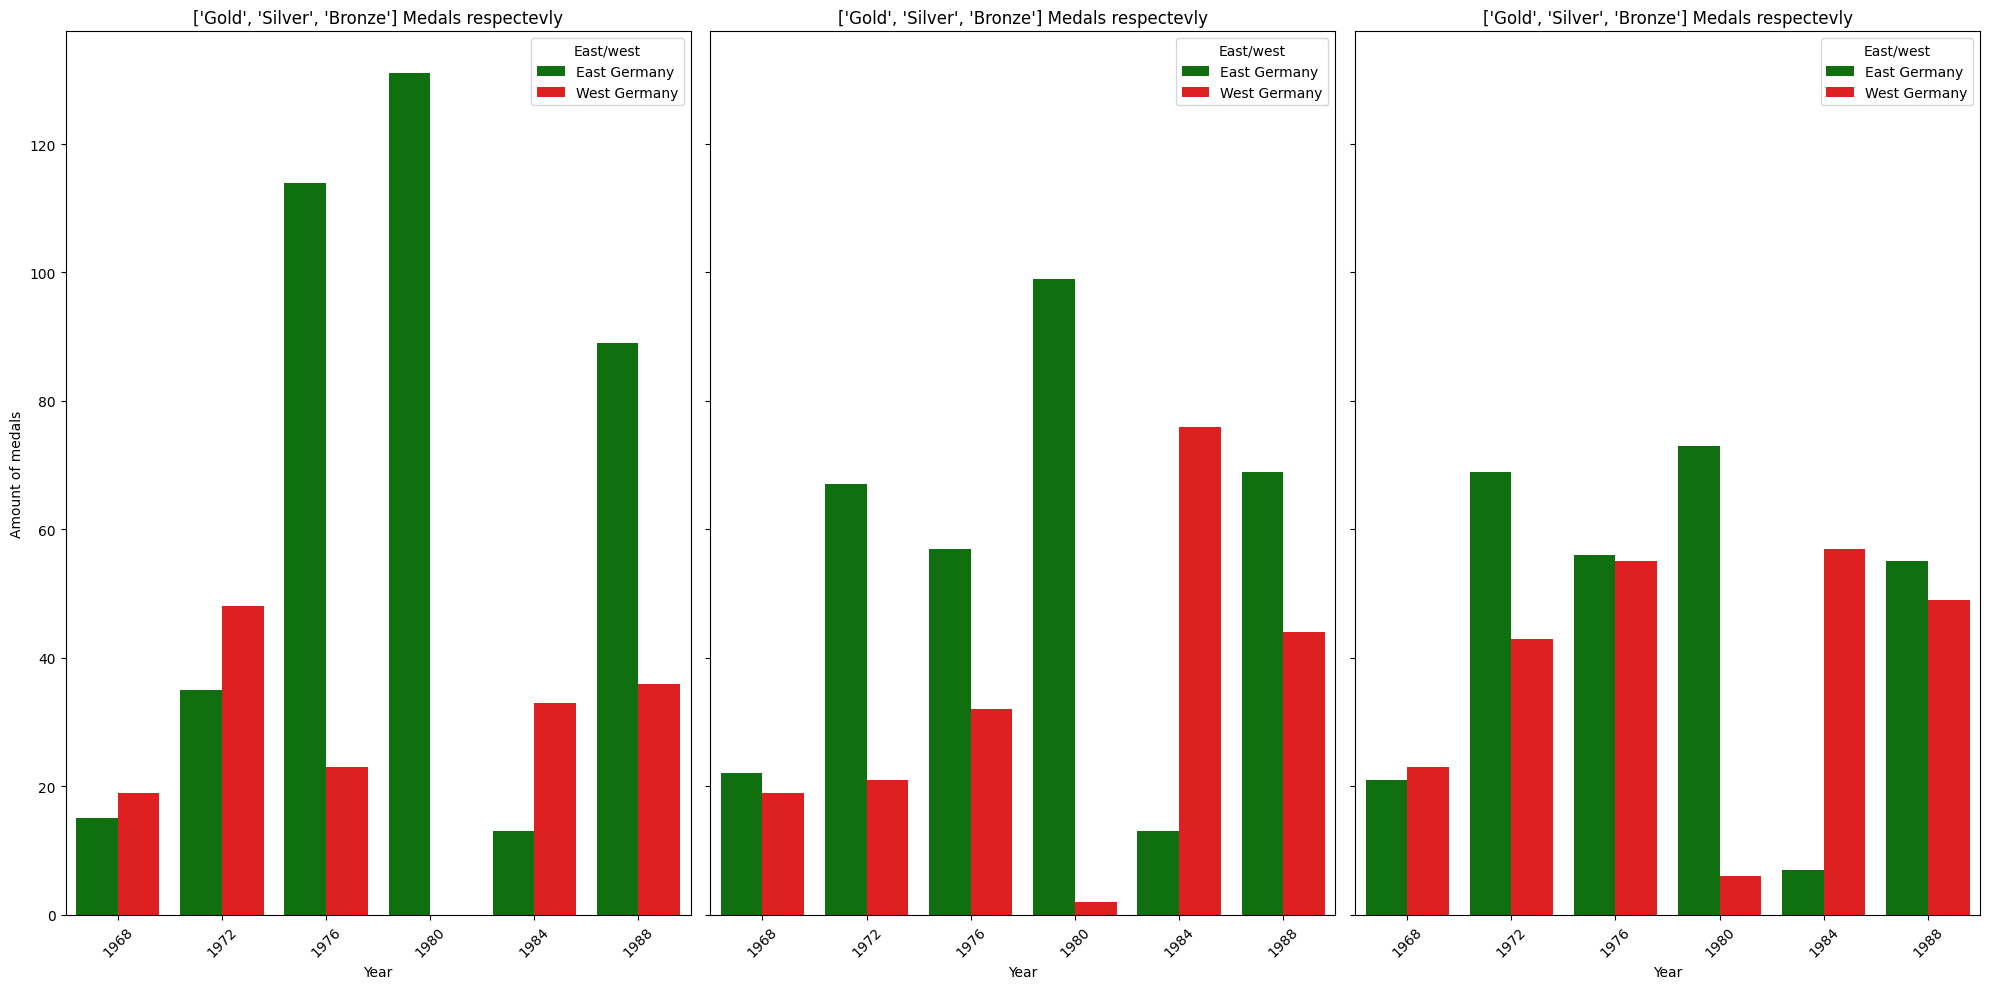

In [62]:
east = east_germany[['Year', 'Medal']].dropna(subset=['Medal'])
east_medals = east.groupby(['Year', 'Medal']).size().unstack(fill_value=0)
east_medals

west = west_germany[['Year', 'Medal']].dropna(subset=['Medal'])
west_medals = west.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

fallen_years = sorted(set(west_medals.index).union(set(east_medals.index)))
Dif_medals = ['Gold', 'Silver', 'Bronze']

fig, axes= plt.subplots(1,3, figsize=(20,10),sharey=True)


for i, medal in enumerate (Dif_medals):
    ax = axes[i]
    plotting = pd.DataFrame({'Year': fallen_years, 'East Germany':east_medals[medal].values,'West Germany': west_medals[medal].values})

    medal_molten = plotting.melt(id_vars='Year', var_name='East/west', value_name= 'Number of medals')
    sns.barplot(data=medal_molten,x='Year', y='Number of medals', ax=ax, hue='East/west', palette= {'East Germany': 'green', 'West Germany': 'red'})
    ax.set_title(f'{Dif_medals} Medals respectevly')
    ax.set_xlabel('Year')
    ax.set_ylabel('Amount of medals')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


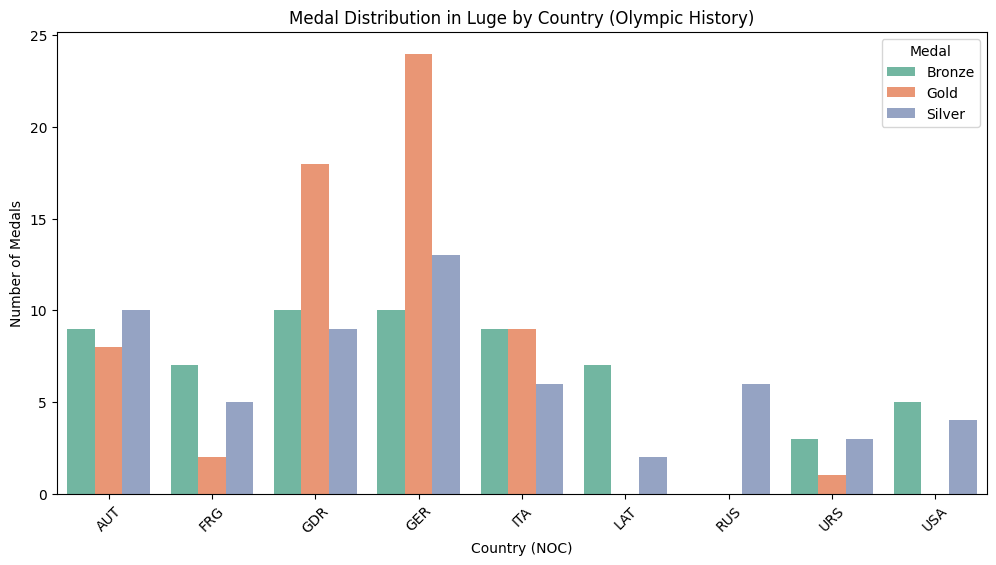

In [ ]:
Functions.medals_per_column(olympics, "Luge")

C:\Users\matti\AppData\Local\Temp\ipykernel_24064\3131264859.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




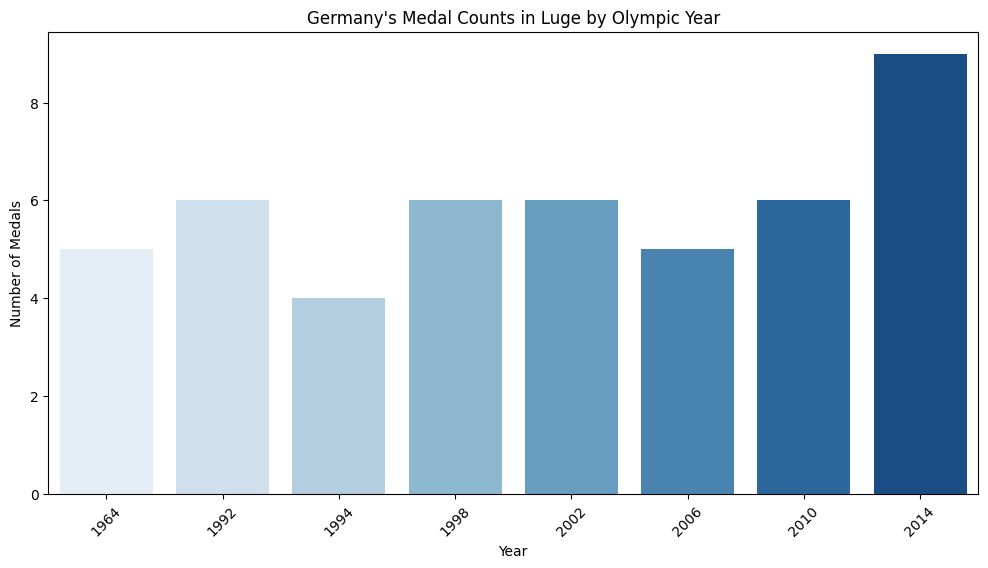

In [ ]:
luge_ger = olympics[(olympics["Sport"] == "Luge") & (olympics["Medal"].notna()) & (olympics["NOC"] == "GER")]
medals_per_year = luge_ger.groupby("Year")["Medal"].count().reset_index()
medals_per_year = medals_per_year.sort_values("Medal", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data = medals_per_year, x = "Year", y = "Medal", palette = "Blues")
plt.title("Germany's Medal Counts in Luge by Olympic Year")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.xticks(rotation = 45)
plt.show()

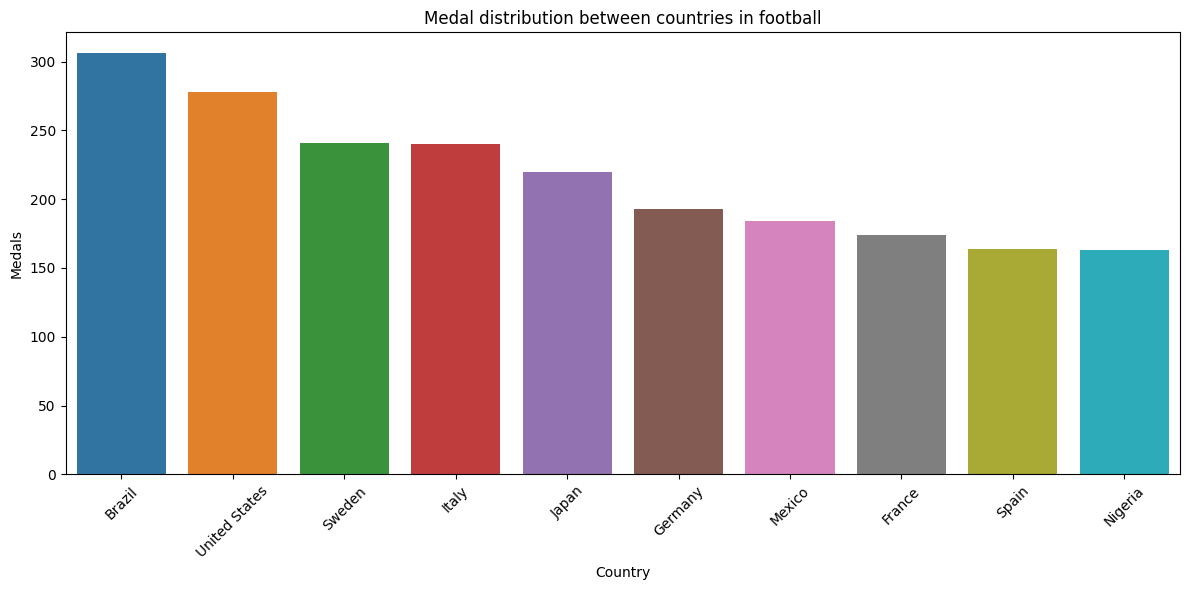

In [ ]:
football = olympics[olympics['Sport'] == 'Football'].copy()
football_medals = football[football['Team'].notna()].copy()

medals_by_country = football_medals["Team"].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=medals_by_country.index, y=medals_by_country.values, palette='tab10', hue=medals_by_country.index, legend=False)
plt.title("Medal distribution between countries in football")
plt.ylabel("Medals")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

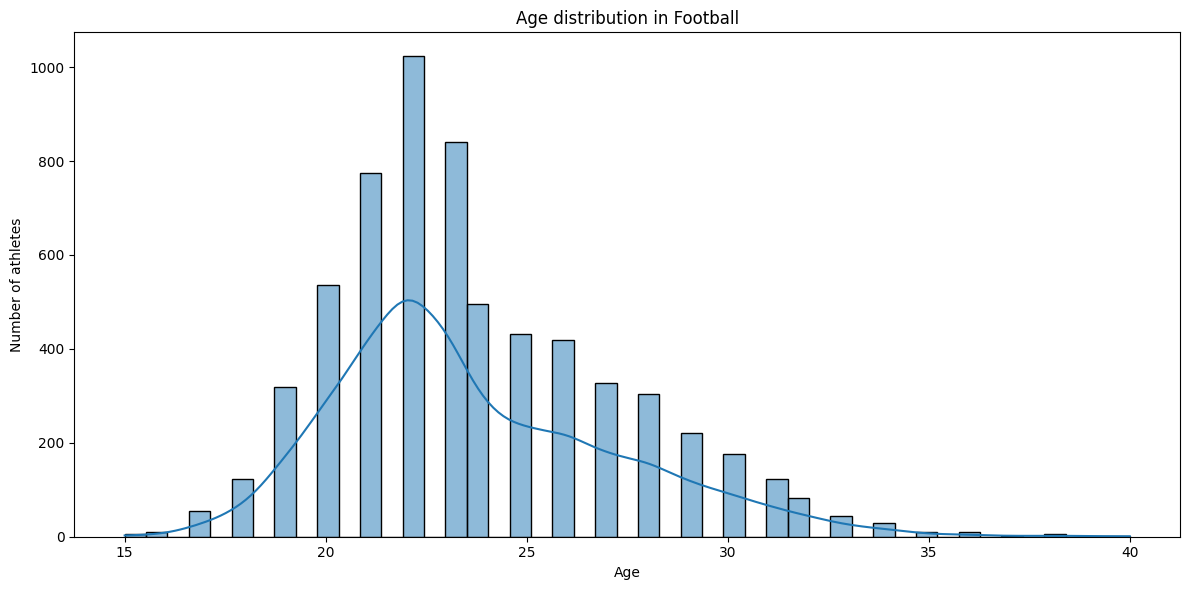

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=football, x='Age', kde=True)
plt.title("Age distribution in Football")
plt.xlabel('Age')
plt.ylabel('Number of athletes')
plt.tight_layout()
plt.show()